In [3]:
# Import the required libraries & modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

In [4]:
import os
os.chdir("C:/Users/EJ312WS/Downloads/TMC/TMC")

In [5]:
gbc_patients = pd.read_excel("sem2_working_gbc_cleaned.xlsx")

In [6]:
gbc_patients.head()

,Thyroidism,HTN,Family_cancer_history,ECOG_final,Gall_stone_final,Pathology,Tumour_grade_final,Cancer_presentation_final,Tumour_stage_final,Mets_site_final,...,AGE_random,BMI_DETAILS_random,BILIRUBIN_CONJUGATED_random,BILIRUBIN_UNCONJUGATED_random,BILIRUBIN_TOTAL_random,AST_SGOT_random,ALT_SGPT_random,ALK_PHOS_ALP_random,GAMMA_GT_random,ALBUMIN_random
0,No,Yes,No,1,Yes,Adenocarcinoma,Grade 3,Incidental,Stage IV,Not applicable,...,60,24.93,0.0,0.5,0.5,23,28,147,21,4.7
1,No,No,No,1,Unknown,Adenocarcinoma,Grade X,Metastatic,Stage IV,"Liver or Liver+others(lungs,bones)",...,58,22.55,0.0,1.1,0.4,348,78,206,481,3.2
2,No,Yes,No,2,Yes,Adenocarcinoma,Grade X,Metastatic,Stage IV,"Liver or Liver+others(lungs,bones)",...,62,0.00,0.0,0.2,0.7,428,266,676,99,3.8
3,No,Yes,Unknown,1,Yes,Others,Grade 2,Incidental,Stage II,Not applicable,...,62,20.22,0.0,1.0,1.0,36,31,108,21,4.6
4,Hypothyroidism,Yes,Unknown,Unknown,Yes,Adenocarcinoma,Grade X,Locally advanced,Unknown,Not applicable,...,77,24.15,12.1,2.0,20.5,286,130,492,209,2.6


In [7]:
gbc_patients.shape

(485, 25)

In [8]:
gbc_patients.isnull().sum()

Thyroidism                       0
HTN                              0
Family_cancer_history            0
ECOG_final                       0
Gall_stone_final                 0
Pathology                        0
Tumour_grade_final               0
Cancer_presentation_final        0
Tumour_stage_final               0
Mets_site_final                  0
Surgery_final                    0
Treatment_final                  0
Status                           0
GENDER                           0
Diabetes_final                   0
AGE_random                       0
BMI_DETAILS_random               0
BILIRUBIN_CONJUGATED_random      0
BILIRUBIN_UNCONJUGATED_random    0
BILIRUBIN_TOTAL_random           0
AST_SGOT_random                  0
ALT_SGPT_random                  0
ALK_PHOS_ALP_random              0
GAMMA_GT_random                  0
ALBUMIN_random                   0
dtype: int64

In [9]:
gbc_patients["Status"].value_counts()

Status
Dead     425
Alive     60
Name: count, dtype: int64

In [10]:
import pandas as pd
from tabulate import tabulate

# Assuming you have already defined gbc_patients DataFrame and imported tabulate

# Filter columns with object data type
categorical_columns = gbc_patients.select_dtypes(include=['object']).columns

# Calculate counts of each category in categorical features
category_counts = {}

for column in categorical_columns:
    counts = gbc_patients[column].value_counts()
    category_counts[column] = counts

# Beautify and print the counts of each category in categorical features
for column, counts in category_counts.items():
    print(f'Counts for {column}:')
    print(tabulate(counts.reset_index(), headers=[column, 'Count'], tablefmt='grid'))
    print()


Counts for Thyroidism:
+----+----------------+---------+
|    | Thyroidism     |   Count |
+====+================+=========+
|  0 | No             |     347 |
+----+----------------+---------+
|  1 | Unknown        |      93 |
+----+----------------+---------+
|  2 | Hypothyroidism |      45 |
+----+----------------+---------+

Counts for HTN:
+----+---------+---------+
|    | HTN     |   Count |
+====+=========+=========+
|  0 | No      |     228 |
+----+---------+---------+
|  1 | Yes     |     173 |
+----+---------+---------+
|  2 | Unknown |      84 |
+----+---------+---------+

Counts for Family_cancer_history:
+----+-------------------------+---------+
|    | Family_cancer_history   |   Count |
+====+=========================+=========+
|  0 | Unknown                 |     261 |
+----+-------------------------+---------+
|  1 | No                      |     177 |
+----+-------------------------+---------+
|  2 | Yes                     |      47 |
+----+-------------------------+

In [11]:
#problamatic Names therefore changing the names of a few categories

# Replace the specific values in the 'Mets_site_final' column
gbc_patients['Mets_site_final'] = gbc_patients['Mets_site_final'].replace({
    'Liver or Liver+others(lungs,bones)': 'Liver_and_Near_organs',
    'Peritoneum & Omentum': 'Peritoneum_and_Omentum'
})

# Display the updated DataFrame
print(gbc_patients['Mets_site_final'].value_counts())


Mets_site_final
Not applicable            202
Liver_and_Near_organs     162
Others                     69
Peritoneum_and_Omentum     34
Lungs                      18
Name: count, dtype: int64


In [12]:
gbc_patients.columns

Index(['Thyroidism', 'HTN', 'Family_cancer_history', 'ECOG_final',
       'Gall_stone_final', 'Pathology', 'Tumour_grade_final',
       'Cancer_presentation_final', 'Tumour_stage_final', 'Mets_site_final',
       'Surgery_final', 'Treatment_final', 'Status', 'GENDER',
       'Diabetes_final', 'AGE_random', 'BMI_DETAILS_random',
       'BILIRUBIN_CONJUGATED_random', 'BILIRUBIN_UNCONJUGATED_random',
       'BILIRUBIN_TOTAL_random', 'AST_SGOT_random', 'ALT_SGPT_random',
       'ALK_PHOS_ALP_random', 'GAMMA_GT_random', 'ALBUMIN_random'],
      dtype='object')

In [13]:
gbc_patients.to_excel('sem2_working_gbc_clean_final.xlsx', index=False)

In [14]:
'''
# REMOVING SPACES FROM EVERY CATEGORY NAME
import pandas as pd

# Your DataFrame gbc_patients
# Assuming gbc_patients is already defined with your data

# Define a function to replace spaces with underscores in a given column
def replace_spaces_with_underscores(column):
    return column.str.replace(' ', '_')

# List of columns where you want to replace spaces with underscores
columns_to_replace = ['Thyroidism', 'HTN', 'Family_cancer_history', 'ECOG_final', 'Gall_stone_final', 
                      'Pathology', 'Tumour_grade_final', 'Cancer_presentation_final', 'Tumour_stage_final', 
                      'Mets_site_final', 'Surgery_final', 'Treatment_final', 'Status', 'GENDER', 'Diabetes_final']

# Apply the function to each specified column
for col in columns_to_replace:
    gbc_patients[col] = replace_spaces_with_underscores(gbc_patients[col])

# Display the updated DataFrame
print(gbc_patients)
'''

"\n# REMOVING SPACES FROM EVERY CATEGORY NAME\nimport pandas as pd\n\n# Your DataFrame gbc_patients\n# Assuming gbc_patients is already defined with your data\n\n# Define a function to replace spaces with underscores in a given column\ndef replace_spaces_with_underscores(column):\n    return column.str.replace(' ', '_')\n\n# List of columns where you want to replace spaces with underscores\ncolumns_to_replace = ['Thyroidism', 'HTN', 'Family_cancer_history', 'ECOG_final', 'Gall_stone_final', \n                      'Pathology', 'Tumour_grade_final', 'Cancer_presentation_final', 'Tumour_stage_final', \n                      'Mets_site_final', 'Surgery_final', 'Treatment_final', 'Status', 'GENDER', 'Diabetes_final']\n\n# Apply the function to each specified column\nfor col in columns_to_replace:\n    gbc_patients[col] = replace_spaces_with_underscores(gbc_patients[col])\n\n# Display the updated DataFrame\nprint(gbc_patients)\n"

In [15]:
# label = 'ECOG_final', 'Tumour_grade_final' , 'Tumour_stage_final', 'Treatment_final'
# OHE = 'Thyroidism', 'HTN', 'Family_cancer_history', 'Gall_stone_final', 'Pathology', 'Cancer_presentation_final', 'Mets_site_final', 'Surgery_final','GENDER','Diabetes_final'  

In [16]:
gbc_patients = pd.read_excel("sem2_working_gbc_clean_final.xlsx")

In [17]:
gbc_patients.columns

Index(['Thyroidism', 'HTN', 'Family_cancer_history', 'ECOG_final',
       'Gall_stone_final', 'Pathology', 'Tumour_grade_final',
       'Cancer_presentation_final', 'Tumour_stage_final', 'Mets_site_final',
       'Surgery_final', 'Treatment_final', 'Status', 'GENDER',
       'Diabetes_final', 'AGE_random', 'BMI_DETAILS_random',
       'BILIRUBIN_CONJUGATED_random', 'BILIRUBIN_UNCONJUGATED_random',
       'BILIRUBIN_TOTAL_random', 'AST_SGOT_random', 'ALT_SGPT_random',
       'ALK_PHOS_ALP_random', 'GAMMA_GT_random', 'ALBUMIN_random'],
      dtype='object')

In [18]:
import pandas as pd

# Define the categorical columns
categorical_columns = [
    'Thyroidism', 'HTN', 'Family_cancer_history', 'ECOG_final', 'Gall_stone_final', 'Pathology', 'Tumour_grade_final',
    'Cancer_presentation_final', 'Tumour_stage_final', 'Mets_site_final', 'Surgery_final', 'Treatment_final','GENDER', 
    'Diabetes_final'
]

numerical_features = ['AGE_random', 'BMI_DETAILS_random', 'BILIRUBIN_CONJUGATED_random',
                      'BILIRUBIN_UNCONJUGATED_random', 'BILIRUBIN_TOTAL_random', 'AST_SGOT_random',
                      'ALT_SGPT_random', 'ALK_PHOS_ALP_random', 'GAMMA_GT_random', 'ALBUMIN_random']


# Perform one-hot encoding on categorical variables
# gbc_encoded = pd.get_dummies(gbc_patients, columns=categorical_columns, drop_first=True)

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse_output=False).fit(gbc_patients[categorical_columns])
gbc_encoded = enc.transform(gbc_patients[categorical_columns])

all_categories = []
for col, x in zip(categorical_columns, enc.categories_):
    for y in x:
        all_categories.append(col + '_' + y)
        
gbc_encoded = pd.concat([
    gbc_patients[numerical_features], 
    pd.DataFrame(gbc_encoded, columns=all_categories)
], axis=1    
)

# Encode "Status" as 0 for "Dead" and 1 for "Alive"
gbc_encoded['Status'] = gbc_patients['Status'].apply(lambda x: 0 if x == 'Dead' else 1)

In [19]:
gbc_encoded.head()

,AGE_random,BMI_DETAILS_random,BILIRUBIN_CONJUGATED_random,BILIRUBIN_UNCONJUGATED_random,BILIRUBIN_TOTAL_random,AST_SGOT_random,ALT_SGPT_random,ALK_PHOS_ALP_random,GAMMA_GT_random,ALBUMIN_random,...,Treatment_final_Curative,Treatment_final_Disease Control,Treatment_final_Palliative_care,Treatment_final_Unknown,GENDER_FEMA,GENDER_MALE,Diabetes_final_No,Diabetes_final_Unknown,Diabetes_final_Yes,Status
0,60,24.93,0.0,0.5,0.5,23,28,147,21,4.7,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1,58,22.55,0.0,1.1,0.4,348,78,206,481,3.2,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
2,62,0.00,0.0,0.2,0.7,428,266,676,99,3.8,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
3,62,20.22,0.0,1.0,1.0,36,31,108,21,4.6,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
4,77,24.15,12.1,2.0,20.5,286,130,492,209,2.6,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0


In [20]:
gbc_encoded.shape

(485, 68)

In [21]:
gbc_encoded['Status'].value_counts()

Status
0    425
1     60
Name: count, dtype: int64

In [22]:
## ENCODING AND STANDARDIZATION

In [23]:
df_work = gbc_encoded.copy()

In [24]:
df_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 68 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   AGE_random                                  485 non-null    int64  
 1   BMI_DETAILS_random                          485 non-null    float64
 2   BILIRUBIN_CONJUGATED_random                 485 non-null    float64
 3   BILIRUBIN_UNCONJUGATED_random               485 non-null    float64
 4   BILIRUBIN_TOTAL_random                      485 non-null    float64
 5   AST_SGOT_random                             485 non-null    int64  
 6   ALT_SGPT_random                             485 non-null    int64  
 7   ALK_PHOS_ALP_random                         485 non-null    int64  
 8   GAMMA_GT_random                             485 non-null    int64  
 9   ALBUMIN_random                              485 non-null    float64
 10  Thyroidism_Hyp

In [25]:
df_work.isnull().sum()

AGE_random                       0
BMI_DETAILS_random               0
BILIRUBIN_CONJUGATED_random      0
BILIRUBIN_UNCONJUGATED_random    0
BILIRUBIN_TOTAL_random           0
                                ..
GENDER_MALE                      0
Diabetes_final_No                0
Diabetes_final_Unknown           0
Diabetes_final_Yes               0
Status                           0
Length: 68, dtype: int64

In [26]:
df_work.columns

Index(['AGE_random', 'BMI_DETAILS_random', 'BILIRUBIN_CONJUGATED_random',
       'BILIRUBIN_UNCONJUGATED_random', 'BILIRUBIN_TOTAL_random',
       'AST_SGOT_random', 'ALT_SGPT_random', 'ALK_PHOS_ALP_random',
       'GAMMA_GT_random', 'ALBUMIN_random', 'Thyroidism_Hypothyroidism',
       'Thyroidism_No', 'Thyroidism_Unknown', 'HTN_No', 'HTN_Unknown',
       'HTN_Yes', 'Family_cancer_history_No', 'Family_cancer_history_Unknown',
       'Family_cancer_history_Yes', 'ECOG_final_0', 'ECOG_final_1',
       'ECOG_final_2', 'ECOG_final_3', 'ECOG_final_4', 'ECOG_final_Unknown',
       'Gall_stone_final_No', 'Gall_stone_final_Polyp',
       'Gall_stone_final_Unknown', 'Gall_stone_final_Yes',
       'Pathology_Adenocarcinoma', 'Pathology_Adenosquamous carcinoma',
       'Pathology_Neuroendocrine carcinoma', 'Pathology_Others',
       'Tumour_grade_final_Grade 1', 'Tumour_grade_final_Grade 2',
       'Tumour_grade_final_Grade 3', 'Tumour_grade_final_Grade 4',
       'Tumour_grade_final_Grade X', '

In [27]:
df_work.head()

,AGE_random,BMI_DETAILS_random,BILIRUBIN_CONJUGATED_random,BILIRUBIN_UNCONJUGATED_random,BILIRUBIN_TOTAL_random,AST_SGOT_random,ALT_SGPT_random,ALK_PHOS_ALP_random,GAMMA_GT_random,ALBUMIN_random,...,Treatment_final_Curative,Treatment_final_Disease Control,Treatment_final_Palliative_care,Treatment_final_Unknown,GENDER_FEMA,GENDER_MALE,Diabetes_final_No,Diabetes_final_Unknown,Diabetes_final_Yes,Status
0,60,24.93,0.0,0.5,0.5,23,28,147,21,4.7,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1,58,22.55,0.0,1.1,0.4,348,78,206,481,3.2,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
2,62,0.00,0.0,0.2,0.7,428,266,676,99,3.8,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
3,62,20.22,0.0,1.0,1.0,36,31,108,21,4.6,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
4,77,24.15,12.1,2.0,20.5,286,130,492,209,2.6,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0


In [28]:
## ENCODING

In [36]:
!pip install catboost

   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB 435.7 kB/s eta 0:03:52
   ---------------------------------------- 0.1/101.1 MB 744.7 kB/s eta 0:02:16
   ---------------------------------------- 0.1/101.1 MB 853.3 kB/s eta 0:01:59
   ---------------------------------------- 0.2/101.1 MB 1.2 MB/s eta 0:01:25
   ---------------------------------------- 0.3/101.1 MB 1.3 MB/s eta 0:01:18
   ---------------------------------------- 0.5/101.1 MB 1.9 MB/s eta 0:00:54
   ---------------------------------------- 0.6/101.1 MB 1.9 MB/s eta 0:00:52
   ---------------------------------------- 0.8/101.1 MB 2.2 MB/s eta 0:00:46
   ---------------------------------------- 1.2/101.1 MB 2.8 MB/s eta 0:00:37
    --------------------------------------- 1.4/101.1 MB 2.9 MB/s eta 0:00:35
    --------------------------------------- 1.6/101.1 MB 3.2 MB/s eta 0:

In [40]:
!pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 220.2 kB/s eta 0:07:33
   ---------------------------------------- 0.0/99.8 MB 245.8 kB/s eta 0:06:46
   ---------------------------------------- 0.1/99.8 MB 476.3 kB/s eta 0:03:30
   ---------------------------------------- 0.2/99.8 MB 787.7 kB/s eta 0:02:07
   ---------------------------------------- 0.3/99.8 MB 983.9 kB/s eta 0:01:42
   ---------------------------------------- 0.5/99.8 MB 1.6 MB/s eta 0:01:03
   ---------------------------------------- 0.7/99.8 MB 1.9 MB/s eta 0:00:52
   ---------------------------------------- 1.0/99.8 MB 2.4 MB/s eta 0:00:41
    --------------------------------------- 1.4/99.8 MB 3.0 MB/s eta 0:00:33
    --------------------------------------- 1.8/99.8 MB 3.4 MB/s eta 0:00:29
    ------

In [41]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
    --------------------------------------- 0.0/1.3 MB 640.0 kB/s eta 0:00:03
   - -------------------------------------- 0.0/1.3 MB 487.6 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.3 MB 819.2 kB/s eta 0:00:02
   ------- -------------------------------- 0.2/1.3 MB 1.3 MB/s eta 0:00:01
   --------- ------------------------------ 0.3/1.3 MB 1.4 MB/s eta 0:00:01
   ----------------- ---------------------- 0.6/1.3 MB 2.1 MB/s eta 0:00:01
   -------------------------- ------------- 0.9/1.3 MB 2.8 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 3.6 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 3.1 MB/s eta 0:00:00


In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier
import matplotlib.pyplot as plt
from tqdm import tqdm

In [43]:
## MODEL TRAINING ON ENCODED DATA - SINGLE MODEL ANALYSIS (Without Standardization)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 47, number of negative: 341
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000458 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 747
[LightGBM] [Info] Number of data points in the train set: 388, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.121134 -> initscore=-1.981735
[LightGBM] [Info] Start training from score -1.981735
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

<Figure size 1000x800 with 0 Axes>

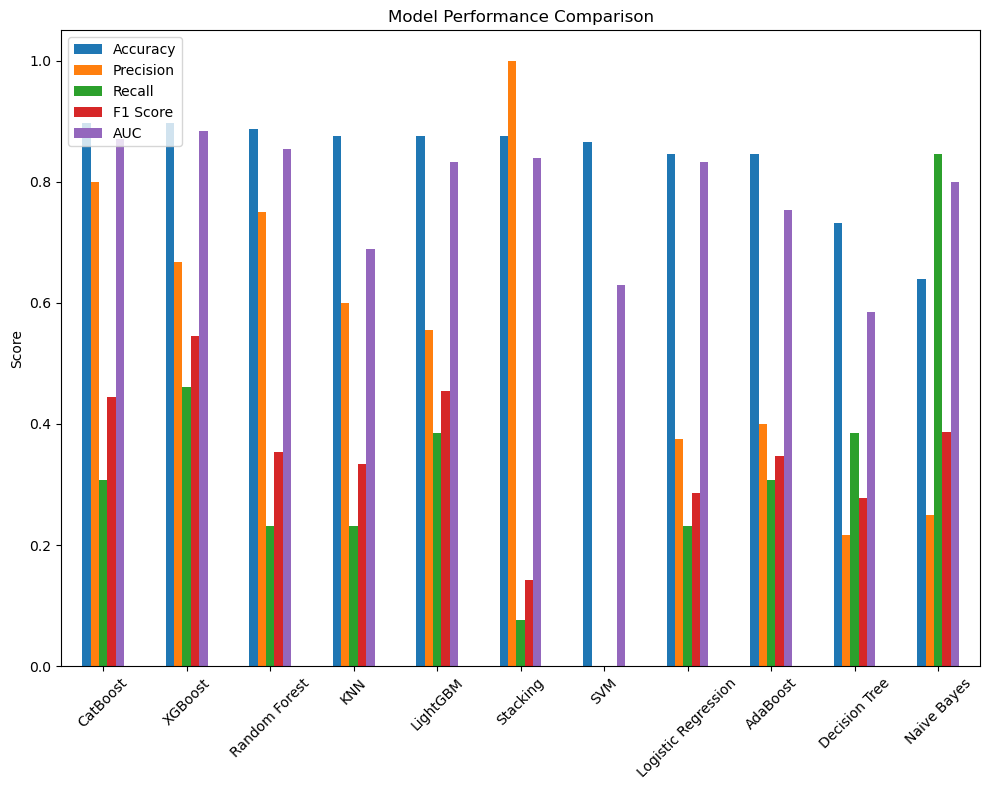

Model evaluation results:
                     Accuracy  Precision    Recall  F1 Score       AUC
Logistic Regression  0.845361   0.375000  0.230769  0.285714  0.832418
Random Forest        0.886598   0.750000  0.230769  0.352941  0.854396
SVM                  0.865979   0.000000  0.000000  0.000000  0.629121
KNN                  0.876289   0.600000  0.230769  0.333333  0.688187
Naive Bayes          0.639175   0.250000  0.846154  0.385965  0.800366
Decision Tree        0.731959   0.217391  0.384615  0.277778  0.585165
AdaBoost             0.845361   0.400000  0.307692  0.347826  0.753663
CatBoost             0.896907   0.800000  0.307692  0.444444  0.870879
XGBoost              0.896907   0.666667  0.461538  0.545455  0.883700
LightGBM             0.876289   0.555556  0.384615  0.454545  0.833333
Stacking             0.876289   1.000000  0.076923  0.142857  0.838828


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Splitting the data into features and target
X = df_work.drop('Status', axis=1)
y = df_work['Status']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0),
    'XGBoost': XGBClassifier(eval_metric='logloss'),
    'LightGBM': LGBMClassifier(),
}

# Adding Stacking Classifier
base_learners = [
    ('rf', RandomForestClassifier()),
    ('svc', SVC(probability=True)),
    ('knn', KNeighborsClassifier())
]
models['Stacking'] = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

# Function to evaluate model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    return accuracy, precision, recall, f1, auc

# Evaluating each model
results = {}
for name, model in models.items():
    results[name] = evaluate_model(model, X_train, X_test, y_train, y_test)

# Converting results to DataFrame for easier visualization
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']).T

# Plotting the results
plt.figure(figsize=(10, 8), facecolor='white')
results_df.sort_values(by='Accuracy', ascending=False).plot(kind='bar', figsize=(10, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('model_performance_comparison.png')
plt.show()

print('Model evaluation results:')
print(results_df)

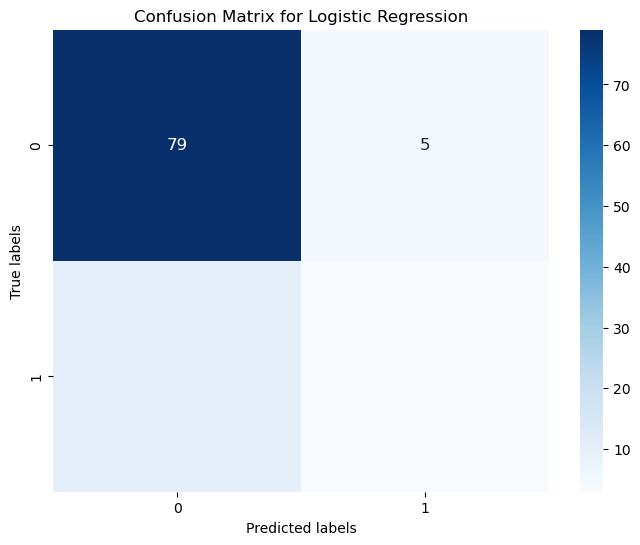

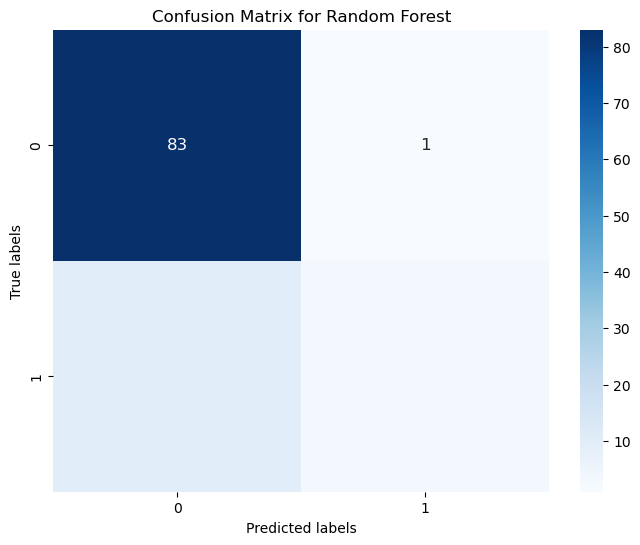

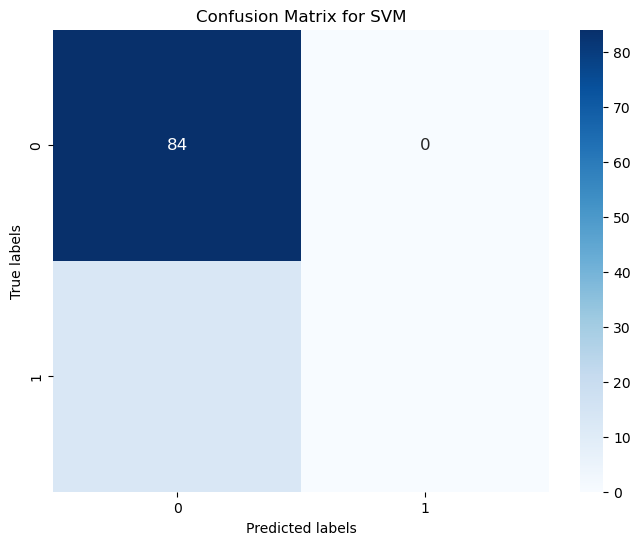

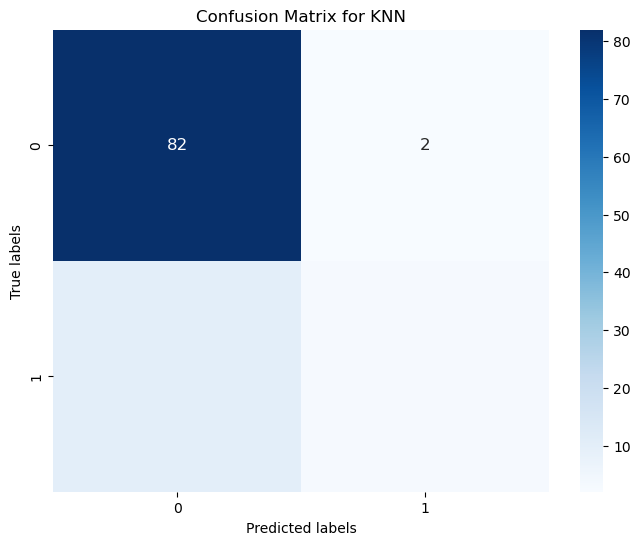

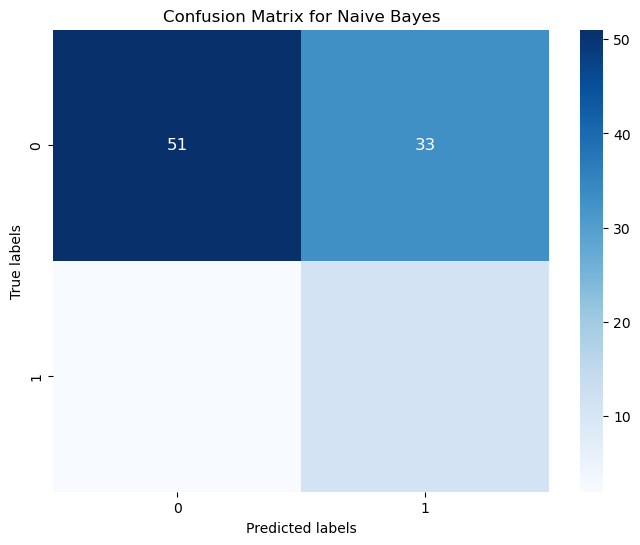

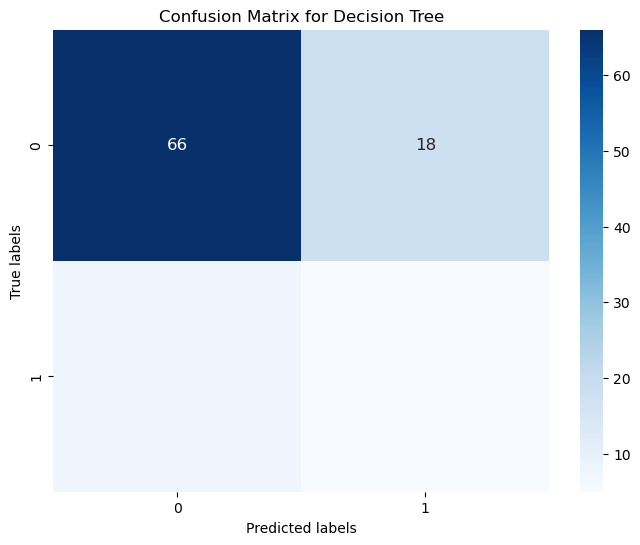

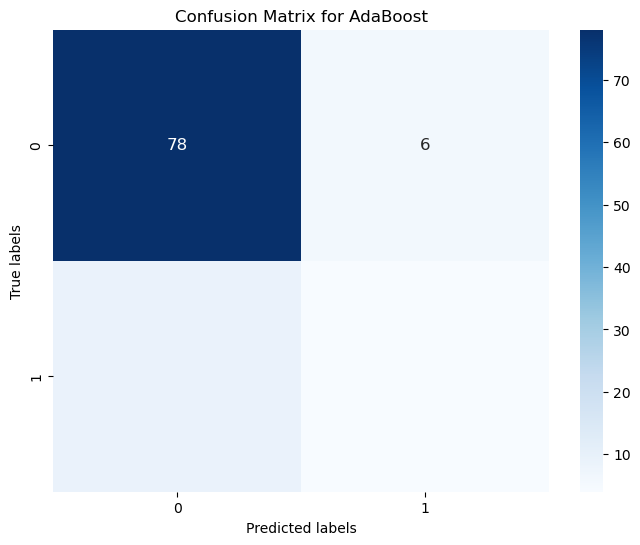

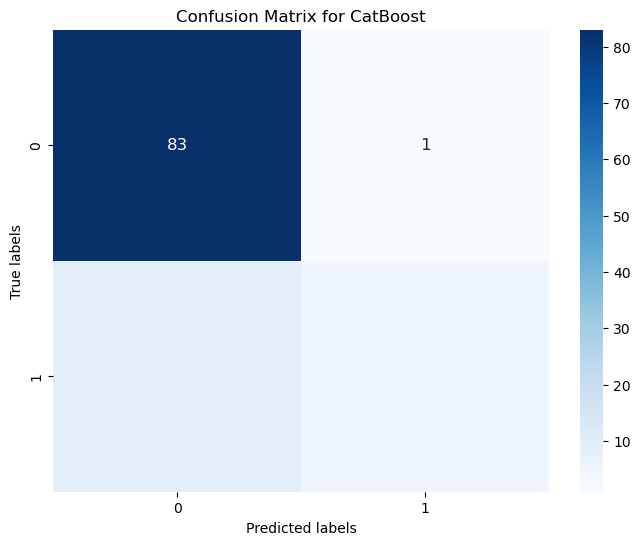

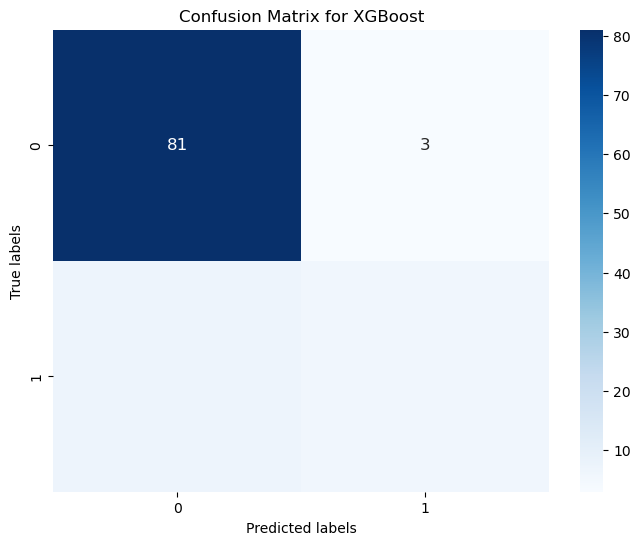

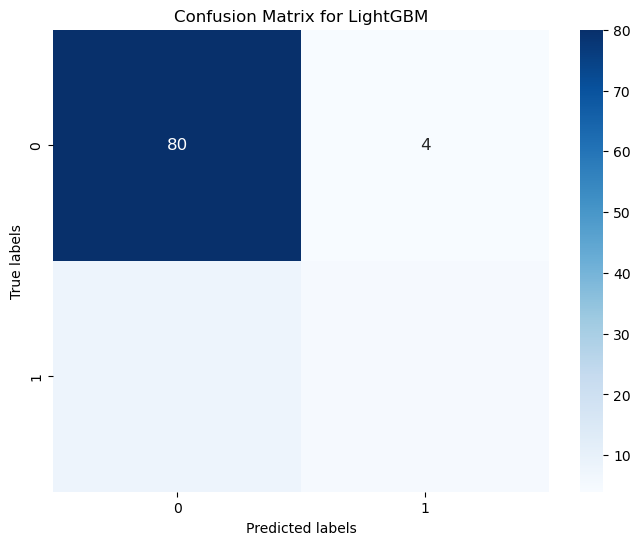

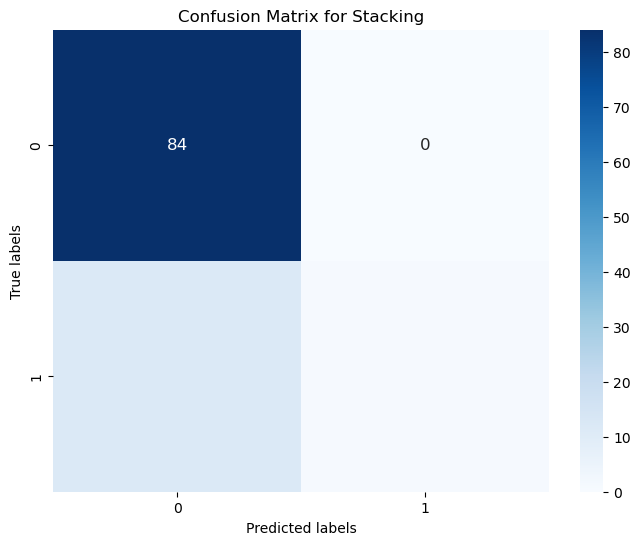

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"fontsize":12})
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Plotting confusion matrix for each model
for name, model in models.items():
    plot_confusion_matrix(model, X_test, y_test, name)


100%|██████████| 11/11 [00:00<00:00, 42.92it/s]


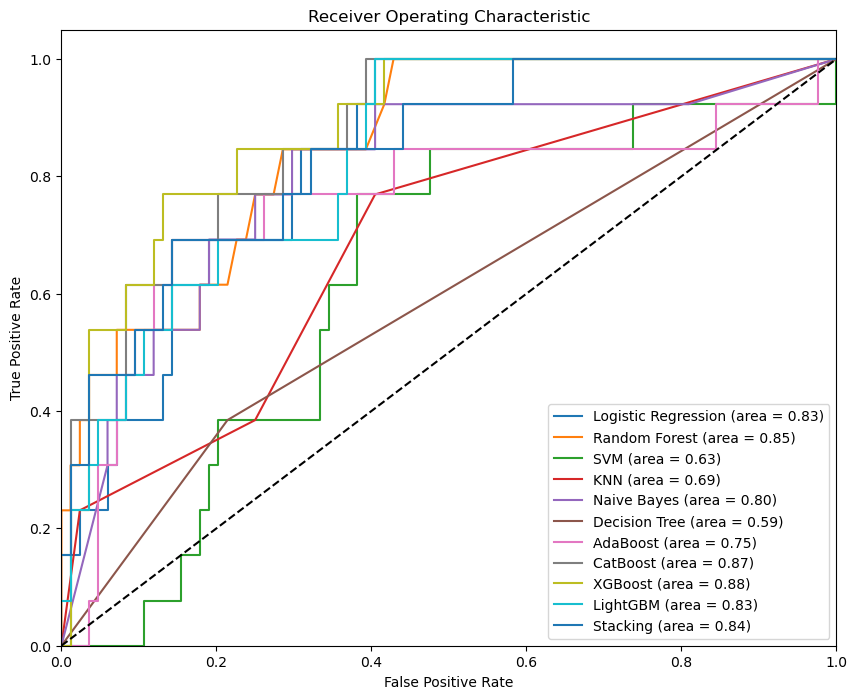

In [46]:
# Plotting AUC-ROC curves for each model
fig, ax = plt.subplots(figsize=(10, 8))

for name, model in tqdm(models.items()):
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [47]:
###############################################################################################################################

In [48]:
## MODEL TRAINING ON ENCODED DATA - SINGLE MODEL ANALYSIS (With Standardization)

In [49]:
y_train.value_counts()

Status
0    341
1     47
Name: count, dtype: int64

Standardization applied to the corrected numerical features. Here is the head of the new dataset:
     AGE_random  BMI_DETAILS_random  BILIRUBIN_CONJUGATED_random  \
460    1.151894           -0.005768                    -0.419252   
25    -0.269655            0.757317                    -0.419252   
220    0.772814            0.917265                     1.781612   
234    0.014655            1.352679                    -0.419252   
357   -1.501663            0.028665                    -0.419252   

     BILIRUBIN_UNCONJUGATED_random  BILIRUBIN_TOTAL_random  AST_SGOT_random  \
460                      -0.749174               -0.482547        -0.324949   
25                        0.448446               -0.431886        -0.454130   
220                       1.474977                4.296529        -0.124719   
234                      -0.406997               -0.414998        -0.370162   
357                      -0.235908               -0.499434        -0.073047   

     ALT_SGPT_rand

<Figure size 1000x800 with 0 Axes>

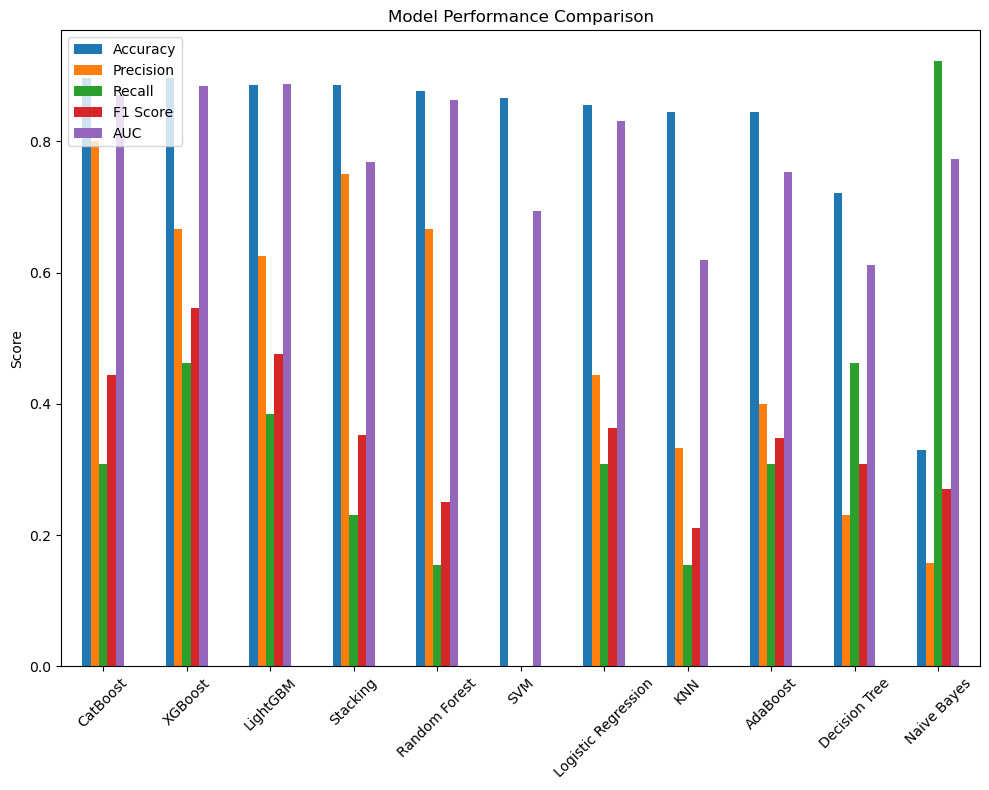

Model evaluation results:
                     Accuracy  Precision    Recall  F1 Score       AUC
Logistic Regression  0.855670   0.444444  0.307692  0.363636  0.831502
Random Forest        0.876289   0.666667  0.153846  0.250000  0.863553
SVM                  0.865979   0.000000  0.000000  0.000000  0.693223
KNN                  0.845361   0.333333  0.153846  0.210526  0.619505
Naive Bayes          0.329897   0.157895  0.923077  0.269663  0.773352
Decision Tree        0.721649   0.230769  0.461538  0.307692  0.611722
AdaBoost             0.845361   0.400000  0.307692  0.347826  0.753663
CatBoost             0.896907   0.800000  0.307692  0.444444  0.870879
XGBoost              0.896907   0.666667  0.461538  0.545455  0.883700
LightGBM             0.886598   0.625000  0.384615  0.476190  0.887363
Stacking             0.886598   0.750000  0.230769  0.352941  0.769231


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Splitting the data into features and target
X = df_work.drop('Status', axis=1)
y = df_work['Status']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adjusting the column names according to the dataset
numerical_cols = [
    'AGE_random', 'BMI_DETAILS_random', 'BILIRUBIN_CONJUGATED_random', 'BILIRUBIN_UNCONJUGATED_random', 'BILIRUBIN_TOTAL_random', 
    'AST_SGOT_random', 'ALT_SGPT_random', 'ALK_PHOS_ALP_random', 'GAMMA_GT_random', 'ALBUMIN_random'
]

# Standardizing the numerical features
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
print('Standardization applied to the corrected numerical features. Here is the head of the new dataset:')
print(X_train.head())

# Defining the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0),
    'XGBoost': XGBClassifier(eval_metric='logloss'),
    'LightGBM': LGBMClassifier(),
}

# Adding Stacking Classifier
base_learners = [
    ('rf', RandomForestClassifier()),
    ('svc', SVC(probability=True)),
    ('knn', KNeighborsClassifier())
]
models['Stacking'] = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

# Function to evaluate model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    return accuracy, precision, recall, f1, auc

# Evaluating each model
results = {}
for name, model in models.items():
    results[name] = evaluate_model(model, X_train, X_test, y_train, y_test)

# Converting results to DataFrame for easier visualization
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']).T

# Plotting the results
plt.figure(figsize=(10, 8), facecolor='white')
results_df.sort_values(by='Accuracy', ascending=False).plot(kind='bar', figsize=(10, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('model_performance_comparison.png')
plt.show()

print('Model evaluation results:')
print(results_df)



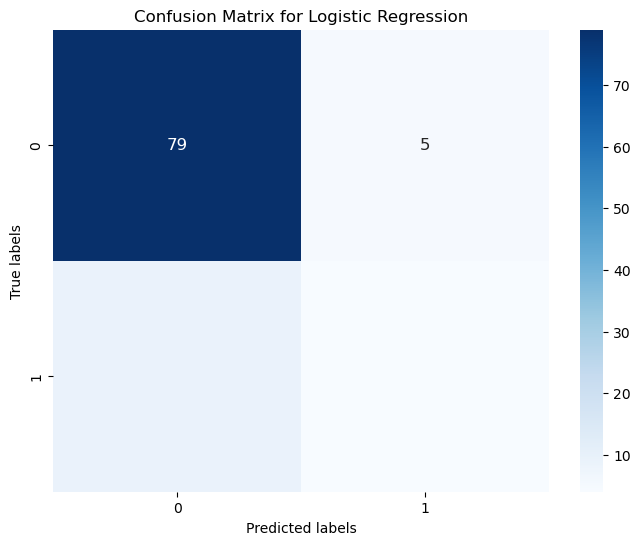

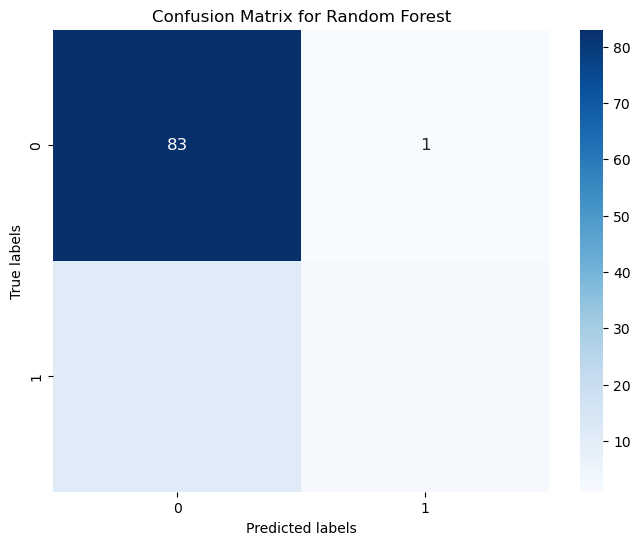

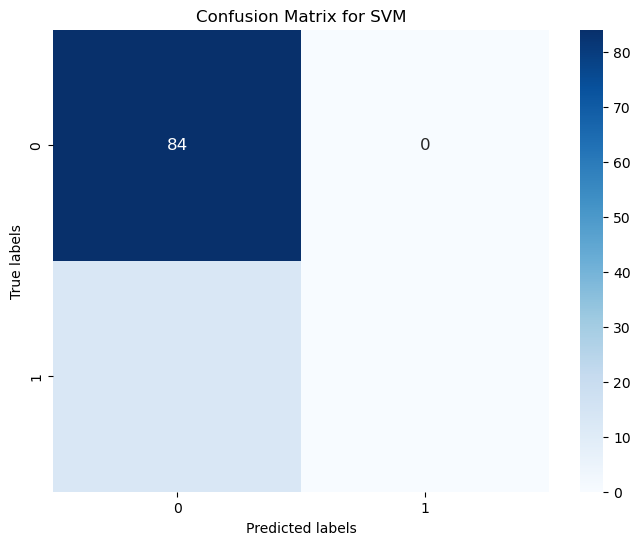

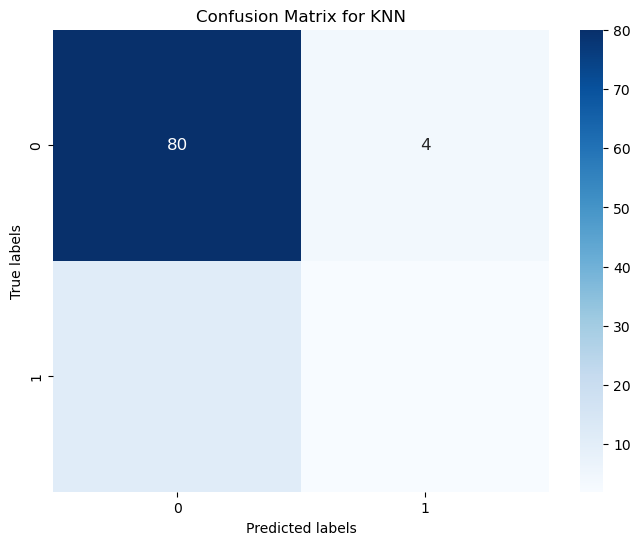

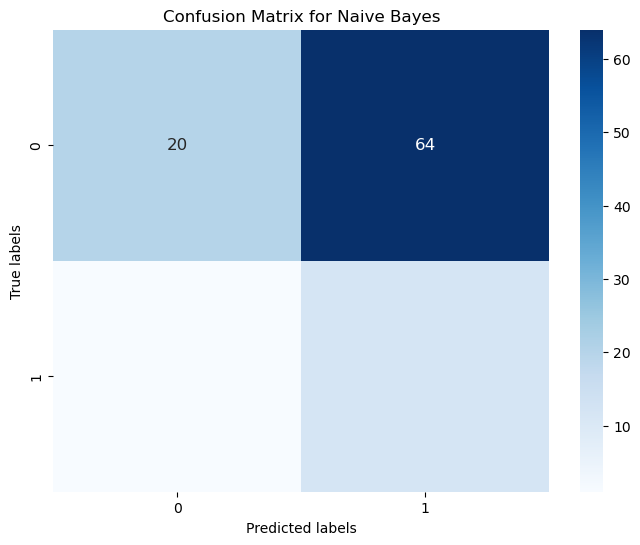

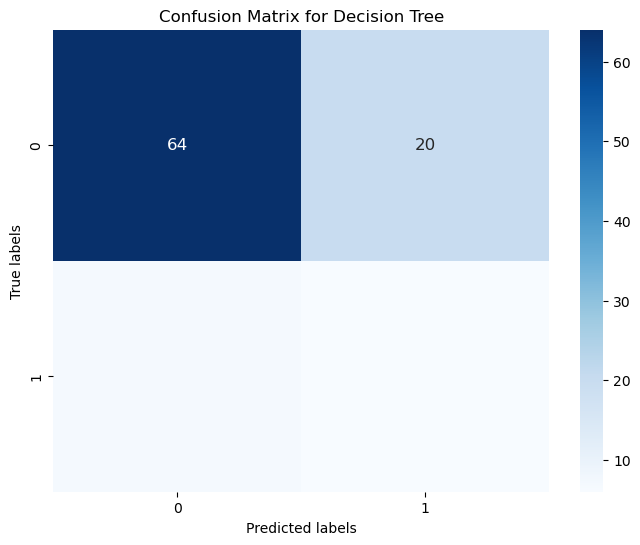

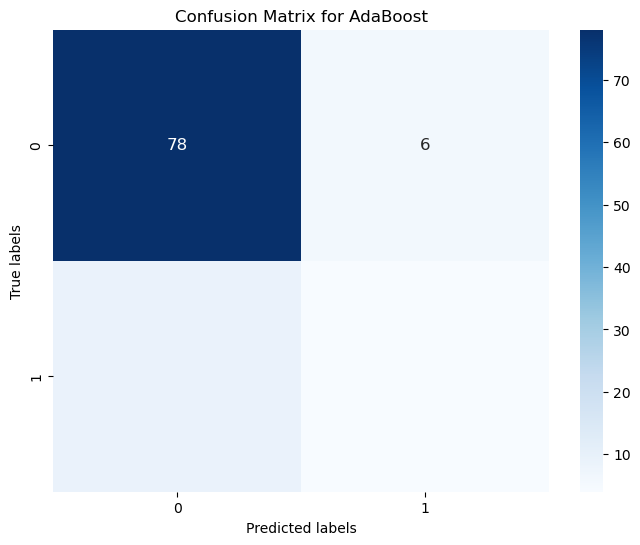

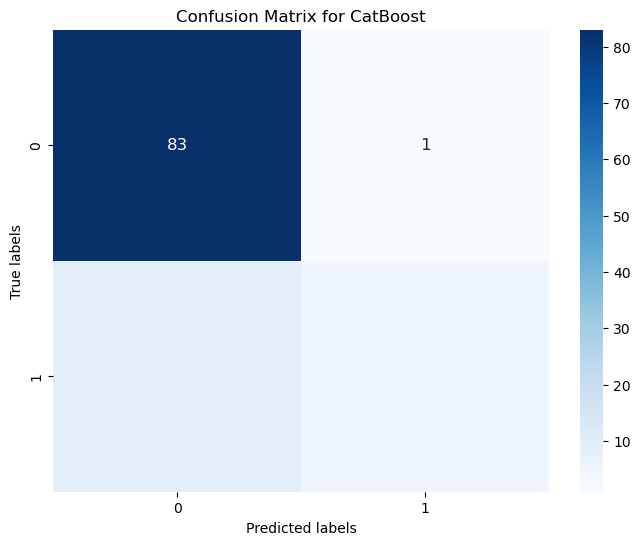

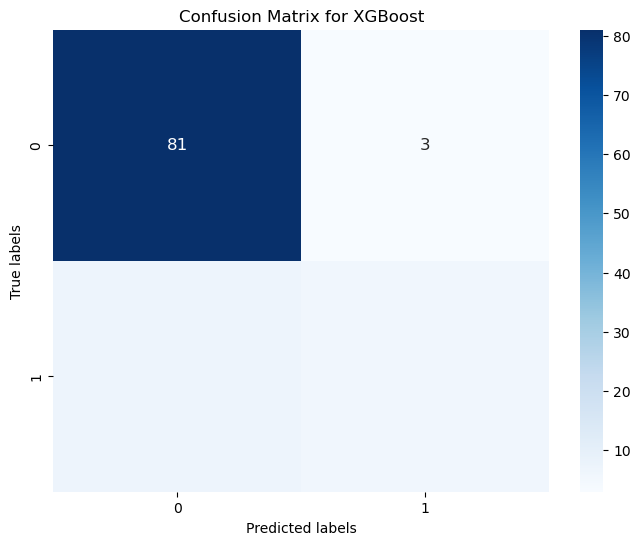

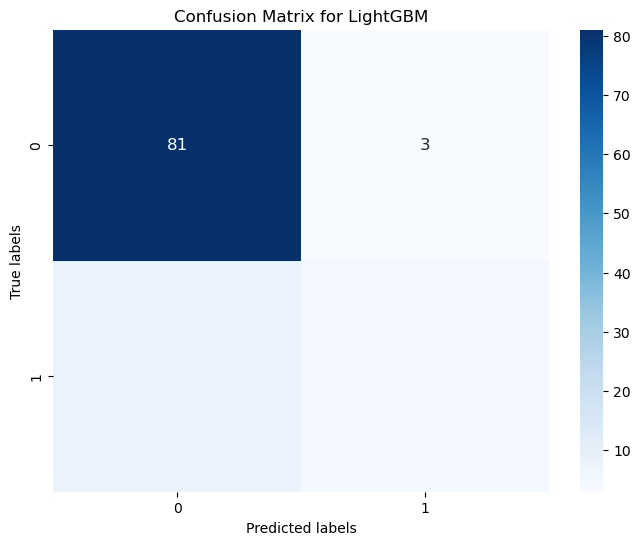

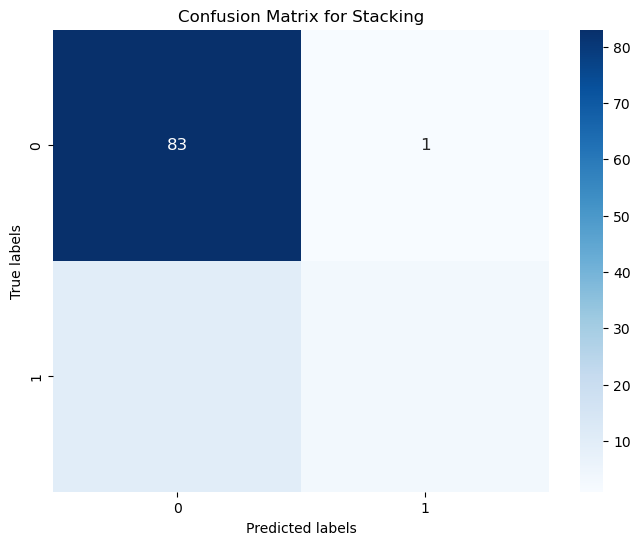

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"fontsize":12})
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Plotting confusion matrix for each model
for name, model in models.items():
    plot_confusion_matrix(model, X_test, y_test, name)


In [52]:
# Function to evaluate model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred = model.predict(X_test)
    return y_pred_proba, y_pred

# Evaluating each model
results_proba = {}
results_pred = {}
for name, model in models.items():
    results_proba[name], results_pred[name] = evaluate_model(model, X_train, X_test, y_train, y_test)

# Testing each sample in the test set separately
for name, y_pred_proba in results_proba.items():
    print(f"Model: {name}")
    for i, (proba, pred, true_label) in enumerate(zip(y_pred_proba, results_pred[name], y_test)):
        print(f"Sample {i+1} - Original Label: {true_label} | Predicted Probability: {proba} | Predicted Label: {pred}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 47, number of negative: 341
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 747
[LightGBM] [Info] Number of data points in the train set: 388, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.121134 -> initscore=-1.981735
[LightGBM] [Info] Start training from score -1.981735
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

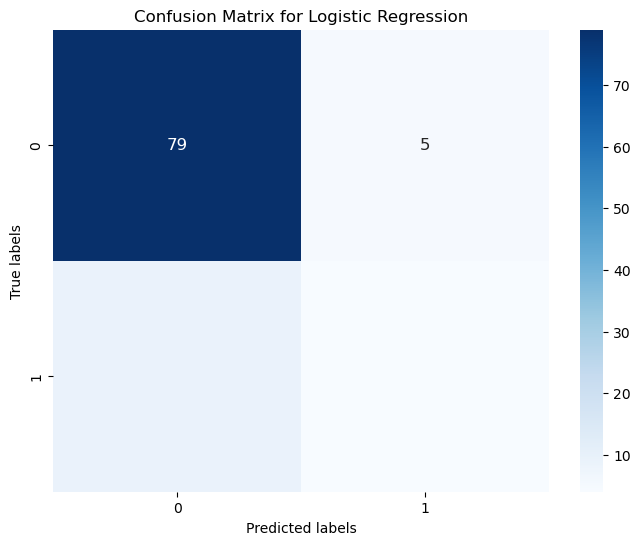

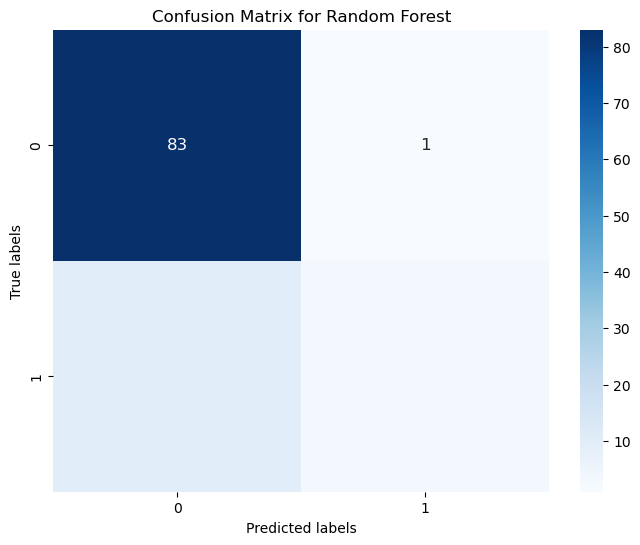

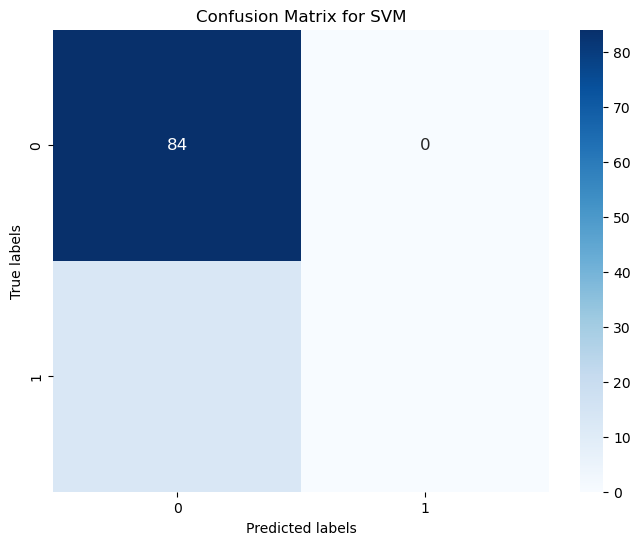

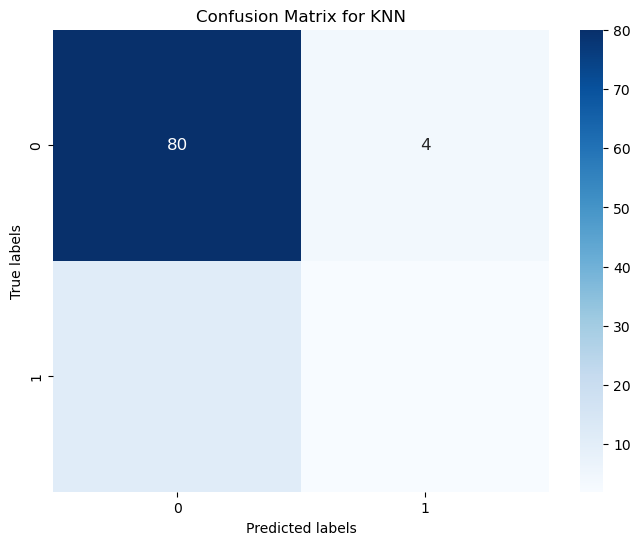

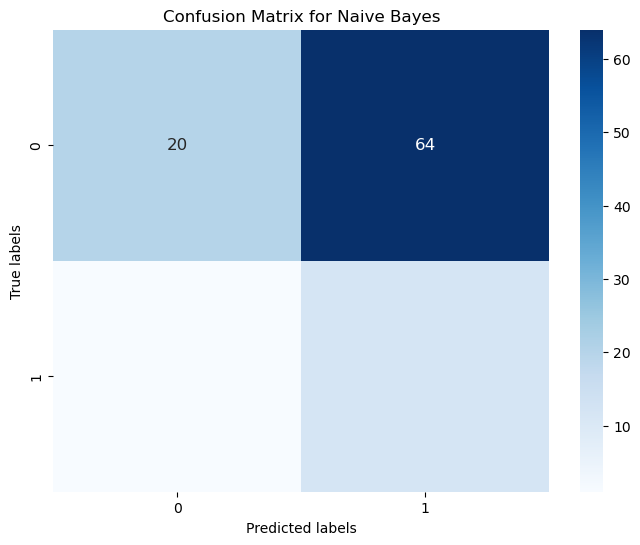

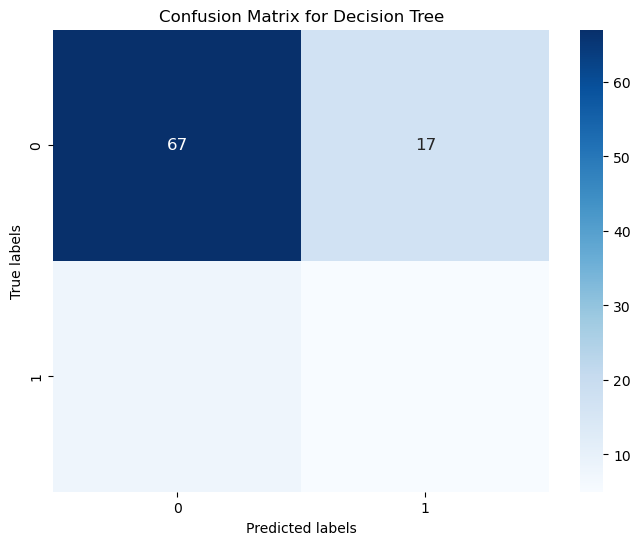

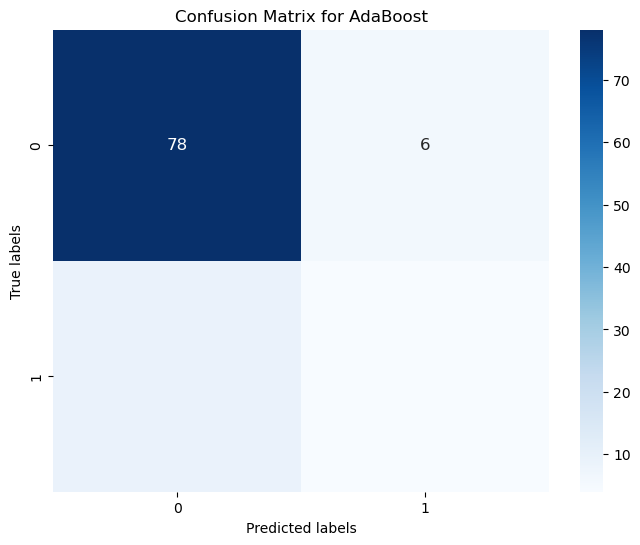

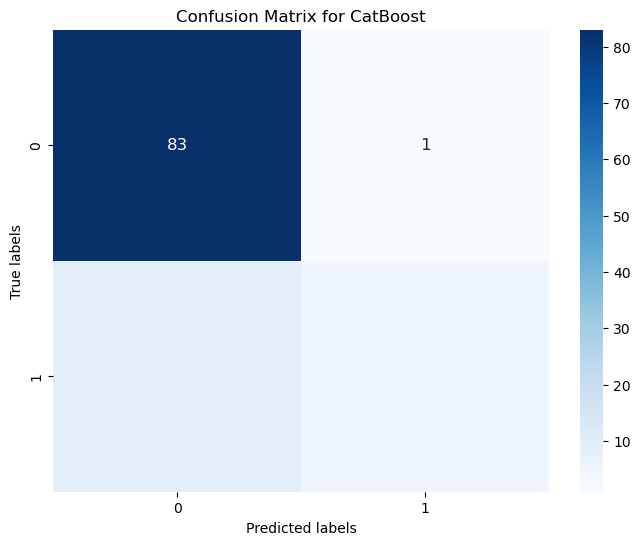

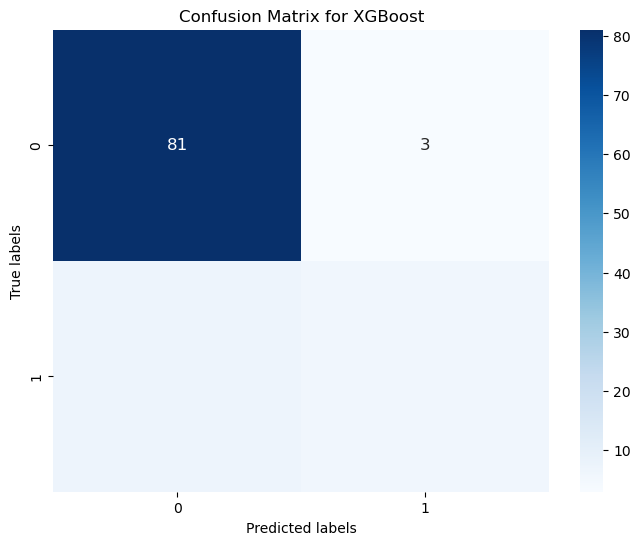

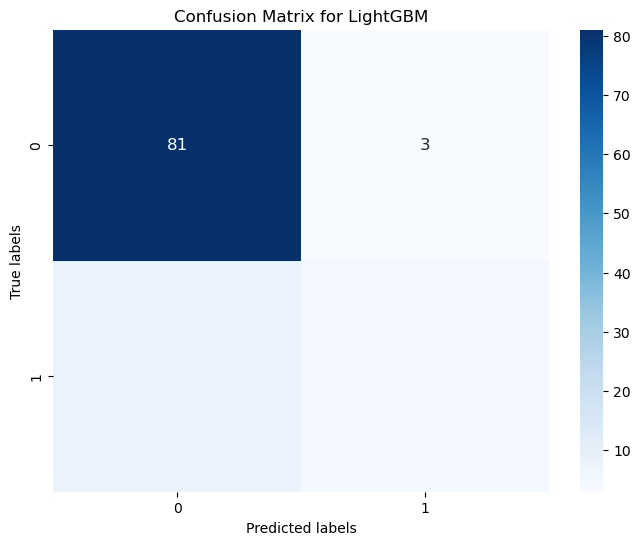

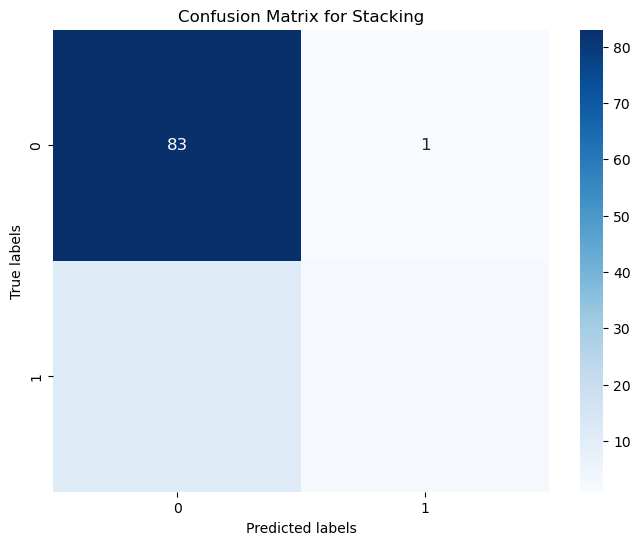

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"fontsize":12})
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Plotting confusion matrix for each model
for name, model in models.items():
    plot_confusion_matrix(model, X_test, y_test, name)


100%|██████████| 11/11 [00:00<00:00, 50.31it/s]


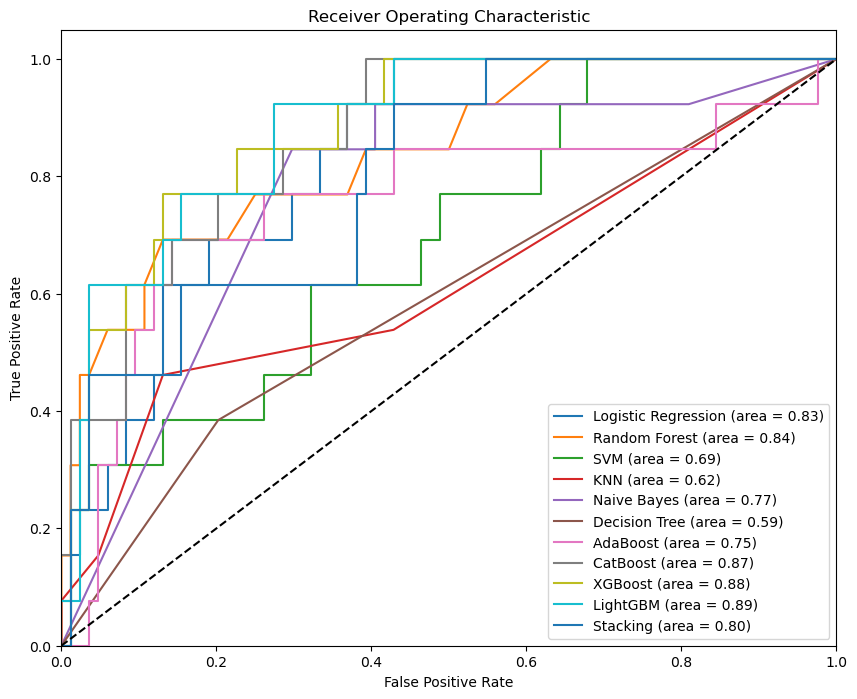

In [54]:
# Plotting AUC-ROC curves for each model
fig, ax = plt.subplots(figsize=(10, 8))

for name, model in tqdm(models.items()):
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [55]:
import pickle

# Dumping the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Dumping the one-hot encoder
with open('onehot_encoder.pkl', 'wb') as f:
    pickle.dump(enc, f)

# Dumping the LightGBM model
lgbm_model = models['LightGBM']
with open('lightgbm_model.pkl', 'wb') as f:
    pickle.dump(lgbm_model, f)


In [56]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [ ]:
## HYERPARAMETER TUNING

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Adjusting the column names according to the dataset
#numerical_cols = ['AGE_random', 'BMI_DETAILS_random', 'BILIRUBIN_CONJUGATED_random', 'BILIRUBIN_UNCONJUGATED_random', 'BILIRUBIN_TOTAL_random', 'AST_SGOT_random', 'ALT_SGPT_random', 'ALK_PHOS_ALP_random', 'GAMMA_GT_random', 'ALBUMIN_random']

# Standardizing the corrected numerical features
#scaler = StandardScaler()
#df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

#print('Standardization applied to the corrected numerical features. Here is the head of the new dataset:')
#print(df.head())

# Splitting the data into features and target
X = df_work.drop('Status', axis=1)
y = df_work['Status']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the models with a broad range of hyperparameters for tuning
models = {
    'Logistic Regression': (LogisticRegression(max_iter=1000), {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2', 'elasticnet', 'none']}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [50, 100, 200, 400], 'max_depth': [None, 10, 20, 50], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}),
    'SVM': (SVC(probability=True), {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto']}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p': [1, 2]}),
    'Naive Bayes': (GaussianNB(), {}),
    'Decision Tree': (DecisionTreeClassifier(), {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 50], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}),
    'AdaBoost': (AdaBoostClassifier(), {'n_estimators': [50, 100, 200, 400], 'learning_rate': [0.001, 0.01, 0.1, 1]}),
    'CatBoost': (CatBoostClassifier(verbose=0), {'learning_rate': [0.01, 0.1, 0.5], 'depth': [4, 6, 8]}),
    'XGBoost': (XGBClassifier(eval_metric='logloss'), {'learning_rate': [0.01, 0.1, 0.5], 'max_depth': [3, 5, 7], 'subsample': [0.5, 0.7, 0.9], 'colsample_bytree': [0.5, 0.7, 0.9]}),
    'LightGBM': (LGBMClassifier(), {'learning_rate': [0.01, 0.1, 0.5], 'max_depth': [3, 5, 7], 'subsample': [0.5, 0.7, 0.9], 'colsample_bytree': [0.5, 0.7, 0.9]}),
}

# Adding Stacking Classifier
base_learners = [
    ('rf', RandomForestClassifier()),
    ('svc', SVC(probability=True)),
    ('knn', KNeighborsClassifier())
]
stacking_params = {
    'final_estimator': [LogisticRegression(), RandomForestClassifier()],
    'stack_method': ['auto', 'predict_proba']
}
models['Stacking'] = (StackingClassifier(estimators=base_learners), stacking_params)

# Function to evaluate model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    return accuracy, precision, recall, f1, auc

# Function to perform grid search with cross-validation
def grid_search_with_cv(model, params, X_train, y_train):
    grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    return best_params, best_model

# Evaluating each model
results = {}
best_params = {}
for name, (model, params) in models.items():
    if params:  # Perform grid search if there are hyperparameters to tune
        best_params[name], tuned_model = grid_search_with_cv(model, params, X_train, y_train)
        results[name] = evaluate_model(tuned_model, X_train, X_test, y_train, y_test)
    else:
        results[name] = evaluate_model(model, X_train, X_test, y_train, y_test)

# Converting results to DataFrame for easier visualization
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']).T

# Plotting the results
plt.figure(figsize=(10, 8), facecolor='white')
results_df.sort_values(by='Accuracy', ascending=False).plot(kind='bar', figsize=(10, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('model_performance_comparison.png')
plt.show()

print('Model evaluation results:')
print(results_df)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the most important hyperparameters for each model
param_distributions = {
    'Logistic Regression': {'C': uniform(0.1, 10), 'penalty': ['l1', 'l2', 'elasticnet'], 'solver': ['liblinear', 'saga']},
    'Random Forest': {'n_estimators': randint(50, 400), 'max_depth': [None, 10, 20, 50], 'min_samples_split': randint(2, 10), 'min_samples_leaf': randint(1, 4), 'bootstrap': [True, False]},
    'SVM': {'C': uniform(0.1, 10), 'kernel': ['linear', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto']},
    'KNN': {'n_neighbors': randint(3, 10), 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree'], 'p': [1, 2]},
    'Decision Tree': {'max_depth': [None, 10, 20, 50], 'min_samples_split': randint(2, 10), 'min_samples_leaf': randint(1, 4)},
    'AdaBoost': {'n_estimators': randint(50, 400), 'learning_rate': uniform(0.001, 1)},
    'CatBoost': {'learning_rate': uniform(0.01, 0.5), 'depth': randint(4, 8)},
    'XGBoost': {'learning_rate': uniform(0.01, 0.5), 'max_depth': randint(3, 7), 'subsample': [0.5, 0.7, 0.9], 'colsample_bytree': [0.5, 0.7, 0.9]},
    'LightGBM': {'learning_rate': uniform(0.01, 0.5), 'max_depth': randint(3, 7), 'subsample': [0.5, 0.7, 0.9], 'colsample_bytree': [0.5, 0.7, 0.9]},
    'Stacking': {'final_estimator': [LogisticRegression(), RandomForestClassifier()], 'stack_method': ['auto', 'predict_proba']}
}

# Function to perform random search with cross-validation
def random_search_with_cv(model, param_dist, X_train, y_train):
    random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', verbose=2, n_jobs=-1, random_state=42)
    random_search.fit(X_train, y_train)
    best_params = random_search.best_params_
    best_model = random_search.best_estimator_
    return best_params, best_model

# Evaluating each model
results = {}
best_params = {}
for name, (model, _) in models.items():
    if name not in param_distributions:  # Skip models with no specified hyperparameters
        results[name] = evaluate_model(model, X_train, X_test, y_train, y_test)
        continue
    best_params[name], tuned_model = random_search_with_cv(model, param_distributions[name], X_train, y_train)
    results[name] = evaluate_model(tuned_model, X_train, X_test, y_train, y_test)

# Converting results to DataFrame for easier visualization
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']).T

# Plotting the results
plt.figure(figsize=(10, 8), facecolor='white')
results_df.sort_values(by='Accuracy', ascending=False).plot(kind='bar', figsize=(10, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('model_performance_comparison.png')
plt.show()

print('Model evaluation results:')
print(results_df)


In [ ]:
'''
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Selecting the dataframe
df = pd.read_excel("final_encoded_gbc_dataset.xlsx")

# Splitting the data into features and target
X = df.drop('Status', axis=1)
y = df['Status']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0),
    'XGBoost': XGBClassifier(eval_metric='logloss'),
    'LightGBM': LGBMClassifier(),
}

# Adding Stacking Classifier
base_learners = [
    ('rf', RandomForestClassifier()),
    ('svc', SVC(probability=True)),
    ('knn', KNeighborsClassifier())
]
models['Stacking'] = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

# Function to evaluate model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    return accuracy, precision, recall, f1, auc

# Evaluating each model
results = {}
for name, model in models.items():
    results[name] = evaluate_model(model, X_train, X_test, y_train, y_test)

# Converting results to DataFrame for easier visualization
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']).T

# Plotting the results
plt.figure(figsize=(10, 8), facecolor='white')
results_df.sort_values(by='Accuracy', ascending=False).plot(kind='bar', figsize=(10, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('model_performance_comparison.png')
plt.show()

print('Model evaluation results:')
print(results_df)
'''